<a href="https://colab.research.google.com/github/ogwora/Core_IP6/blob/master/Moringa_Core_IP_W9_Lawrence_Ondieki_KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Titanic KNN Data Analysis

# 1. 0 The Research Question


Predicting if a passenger in the Titanic survived when it sank in 1912.

# 1.1 Metrics of success


Doing  a Exploratory data analysis that will help understand the provided data, also create K nearest neighbour classification model that is able to predict if a passenger in the titanic would survive an accident or not

# 1.2 Recording the Experimental Design

The following steps will be followed:

1.2.1 Loading the dataset <br>
1.2.2 Data understanding <br>
1.2.3 Data cleaning and manipulation <br>
1.2.4 Exploratory Data analysis <br>
1.2.5 Predictive analysis <br>
1.2.6 Implementing the solution <br>


# 1.3 Understanding the context

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, including Thomas Andrews, her architect.

# 1.4 Data relevance

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)
name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare (British pound)

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat Lifeboat

body Body Identification Number

home.dest Home/Destination

# 2.0 Data Cleaning

## 2.1 Import and load the Libraries

In [3]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2.2 Load the datasets

In [19]:
### getting the datasets
train=pd.read_csv('train_5.csv',index_col='PassengerId')
test=pd.read_csv('test_1.csv',index_col='PassengerId')

In [20]:
### train data
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
## test data
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
### train number of columns and rows
train.shape

(891, 11)

In [23]:
### test number of columns and rows
test.shape

(418, 10)

The 'survived' column will be the target.

In [24]:
### data info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [25]:
### data info
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## 2.3 Data Cleaning and preparation

In [26]:
# Dropping the columns we dont need'
test.head()
test=test.drop(['Name','Ticket'],axis=1)
train=train.drop(['Name','Ticket'],axis=1)
print(test)
print(train)

             Pclass     Sex   Age  SibSp  Parch      Fare Cabin Embarked
PassengerId                                                             
892               3    male  34.5      0      0    7.8292   NaN        Q
893               3  female  47.0      1      0    7.0000   NaN        S
894               2    male  62.0      0      0    9.6875   NaN        Q
895               3    male  27.0      0      0    8.6625   NaN        S
896               3  female  22.0      1      1   12.2875   NaN        S
...             ...     ...   ...    ...    ...       ...   ...      ...
1305              3    male   NaN      0      0    8.0500   NaN        S
1306              1  female  39.0      0      0  108.9000  C105        C
1307              3    male  38.5      0      0    7.2500   NaN        S
1308              3    male   NaN      0      0    8.0500   NaN        S
1309              3    male   NaN      1      1   22.3583   NaN        C

[418 rows x 8 columns]
             Survived  Pcla

In [27]:
##### looking for  missing  values
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
#### looking for missing values
test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Cabin a have alot of missing values from both train and test datasets hence I will drop it, then we will impute age with the  mean.

In [29]:
### dropping cabin in both  cabin in both datas
train=train.drop('Cabin',1)
test=test.drop('Cabin',1)

In [30]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
### imputing the age  with the mean
from sklearn.impute import SimpleImputer
impt=SimpleImputer(missing_values=np.NaN,strategy='mean')
train[['Age','Fare']]=impt.fit_transform(train[['Age','Fare']])
test[['Age','Fare']]=impt.fit_transform(test[['Age','Fare']])

In [32]:
#### dropNA in Embarked
train=train.dropna()
print(train.shape)
print(test.shape)
print(train.isnull().sum())
print(test.isnull().sum())

(889, 8)
(418, 7)
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [33]:
### looking for duplicates
print('any duplicates in train dataset?:-',train.duplicated().any())
print('any duplicates in test dataset?:-',test.duplicated().any())

any duplicates in train dataset?:- True
any duplicates in test dataset?:- True


In [34]:
### dropping the the duplicates
train.drop_duplicates()
test.drop_duplicates()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.50000,0,0,7.8292,Q
893,3,female,47.00000,1,0,7.0000,S
894,2,male,62.00000,0,0,9.6875,Q
895,3,male,27.00000,0,0,8.6625,S
896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
1303,1,female,37.00000,1,0,90.0000,Q
1304,3,female,28.00000,0,0,7.7750,S
1306,1,female,39.00000,0,0,108.9000,C


In [41]:
### checking for outliers for train dataset
q1=train.quantile(0.25)
q3=train.quantile(0.75)
iqr=q3-q3
print('TRAIN DATASET:\n',iqr)

### checking for outliers in test dataset
Q1=test.quantile(0.25)
Q3=test.quantile(0.75)
IQR=Q3-Q1
print('\nTEST DATASET:\n',IQR)

TRAIN DATASET:
 Survived    0.0
Pclass      0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Name: 0.75, dtype: float64

TEST DATASET:
 Pclass     2.0000
Age       12.7500
SibSp      1.0000
Parch      0.0000
Fare      23.6042
dtype: float64


__The train dataset does not have outliers but the test set have outliers.__

In [40]:
# dealing with outliers of test dataset
df_test=test[~((test<(Q1-1.5*iqr))|(test>(Q3+1.5*IQR))).any(axis=1)]


In [43]:
### checking for outliers in test dataset
Q_1=df_test.quantile(0.25)
Q_3=test.quantile(0.75)
IQ_R=Q_3-Q_1
print('\nTEST DATASET:\n',IQ_R)


TEST DATASET:
 Pclass     2.0
Age        7.5
SibSp      1.0
Parch      0.0
Fare      21.5
dtype: float64


We need to understand every column and what it represent and I can encode the data with the right representation for better visualization:

dataset:

Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

sex Sex
age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

fare Passenger Fare (British pound)


embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)







In [44]:
### Rename the columns
train=train.rename(columns={'Pclass':'passenger class','SibSp':'No.sibling/spouse aboard','Parch':'No.parent/children aboard','Embarked':'embarked port'})
test=df_test.rename(columns={'Pclass':'passenger class','SibSp':'No.sibling/spouse aboard','Parch':'No.parent/children aboard','Embarked':'embarked port'})

In [47]:
### replacing for train data
train['Survived']=train['Survived'].replace(0,'not survived').replace(1,'survived')
train['passenger class']=train['passenger class'].replace(1,'first class').replace(2,'second class').replace(3,'third class')
train['embarked port']=train['embarked port'].replace('S','Southampton').replace('Q','Queenstown').replace('C','Cherbourg')
### replacing for test data
test['passenger class']=test['passenger class'].replace(1,'first class').replace(2,'second class').replace(3,'third class')
test['embarked port']=test['embarked port'].replace('S','Southampton').replace('Q','Queenstown').replace('C','Cherbourg')

In [48]:
### our transformed data set for EDA
train.head()


,Survived,passenger class,Sex,Age,No.sibling/spouse aboard,No.parent/children aboard,Fare,embarked port
PassengerId,,,,,,,,
1,not survived,third class,male,22.0,1,0,7.2500,Southampton
2,survived,first class,female,38.0,1,0,71.2833,Cherbourg
3,survived,third class,female,26.0,0,0,7.9250,Southampton
4,survived,first class,female,35.0,1,0,53.1000,Southampton
5,not survived,third class,male,35.0,0,0,8.0500,Southampton


In [49]:
### tranformed test data
test.head()

,passenger class,Sex,Age,No.sibling/spouse aboard,No.parent/children aboard,Fare,embarked port
PassengerId,,,,,,,
895,third class,male,27.00000,0,0,8.6625,Southampton
902,third class,male,30.27259,0,0,7.8958,Southampton
903,first class,male,46.00000,0,0,26.0000,Southampton
906,first class,female,47.00000,1,0,61.1750,Southampton
907,second class,female,24.00000,1,0,27.7208,Cherbourg


# Exploratory Data Analysis

In [50]:
### statistical description of train and test data
train.describe()

,Age,No.sibling/spouse aboard,No.parent/children aboard,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.653446,0.524184,0.382452,32.096681
std,12.968366,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [52]:
### statistical description of test set
test.describe()

,Age,No.sibling/spouse aboard,No.parent/children aboard,Fare
count,143.000000,143.000000,143.0,143.000000
mean,32.666842,0.286713,0.0,20.490206
std,7.414205,0.512140,0.0,13.658390
min,23.000000,0.000000,0.0,7.895800
25%,28.250000,0.000000,0.0,10.000000
50%,30.272590,0.000000,0.0,15.033300
75%,36.000000,1.000000,0.0,26.275000
max,54.000000,2.000000,0.0,61.175000


From the people in the ship, the mean age was 29 years, the oldest being 80 and youngest being less than 1 year.
The highest number of siblings/ spouses on board was 8 and also there was a majority who did not have siblings/ spouses on board.
The Highest number of parent/child  on board was 6.

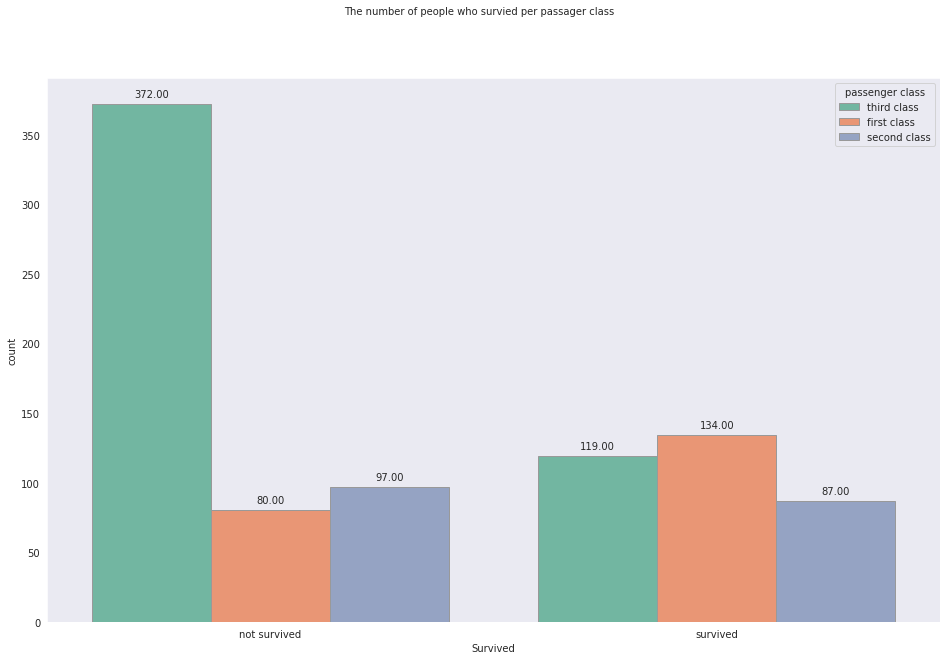

In [54]:
### the count of those that survived
fig,ax=plt.subplots(figsize=(16,10))
sns.set_style('dark')
plt.suptitle('The number of people who survied per passager class',fontsize=(10))
ax=sns.countplot('Survived',hue='passenger class',data=train,palette='Set2',edgecolor=".6")
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')

From the dataset we learn that the highest number of people who did not survive the accident were inthe third class and the lowest 1st class had the lowest number of casualities. On the flip side first class had the highest number of survivors.
2nd class had lowest number of survivor

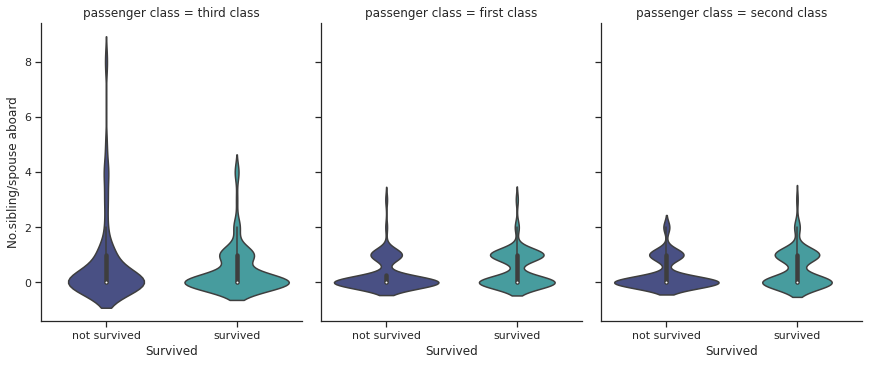

In [55]:
#### number survivors  who were on board with their siblings or spouse
sns.set_theme(style="ticks")
ax=sns.catplot(x='Survived',y='No.sibling/spouse aboard',col='passenger class',
               data=train,kind='violin',palette='mako',aspect=0.8)
 

Alot of the people did not have  siblings in the ship, but we can see a few of them  had and did not survive, in  third class we had the highest number of people who did not survive.

Since  third class was packed with people that is the main reason they have a high number of casualities

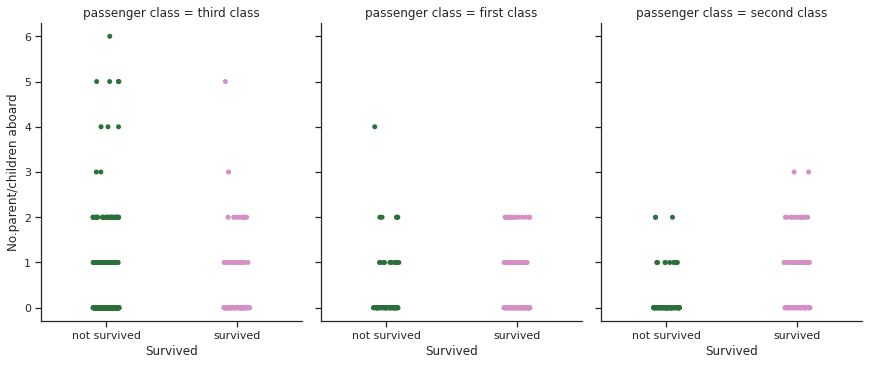

In [56]:
#### number survivors  who were on board with their parents/children
sns.set_theme(style="ticks")
ax=sns.catplot(x='Survived',y='No.parent/children aboard',col='passenger class',
               data=train,palette='cubehelix',aspect=0.8)

Third class still had the highest number of parents and childrens who did not survive. from the all classes we can the average number of parents and children who did not survive.

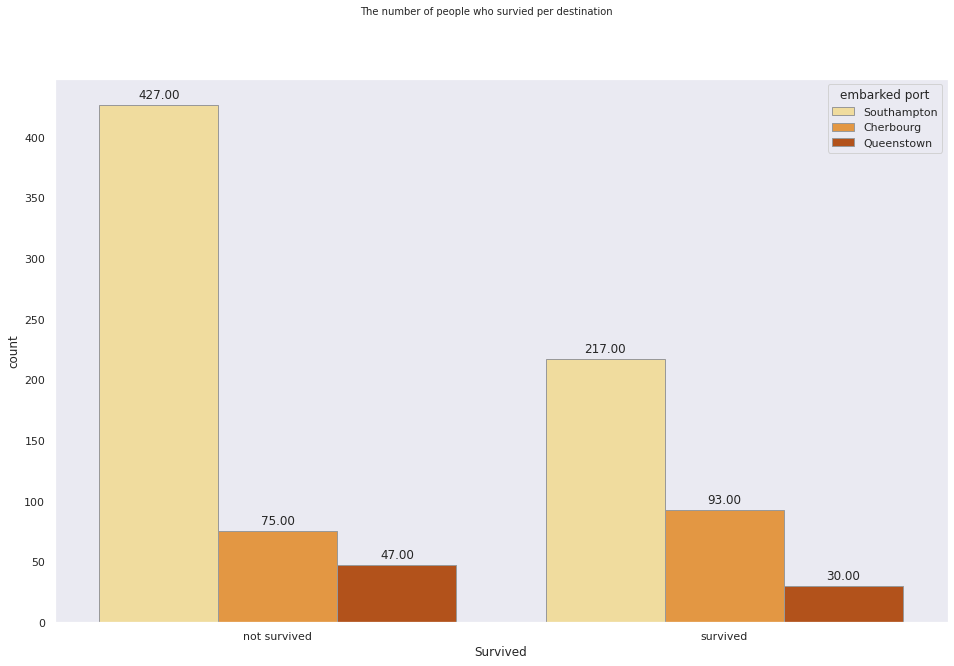

In [58]:
###
### the count of those that survived
fig,ax=plt.subplots(figsize=(16,10))
sns.set_style('dark')
plt.suptitle('The number of people who survied per destination',fontsize=(10))
ax=sns.countplot('Survived',hue='embarked port',data=train,palette="YlOrBr",edgecolor=".6",orient='h')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
              va = 'center', xytext = (0, 10), textcoords = 'offset points')

The highest of casualties had boarded the ship from port in Southampton, then followed by passengers from Cherbourg and Queenstown. 

Port of Southampton still had the highest number of survivors and Queenstown hard the least.

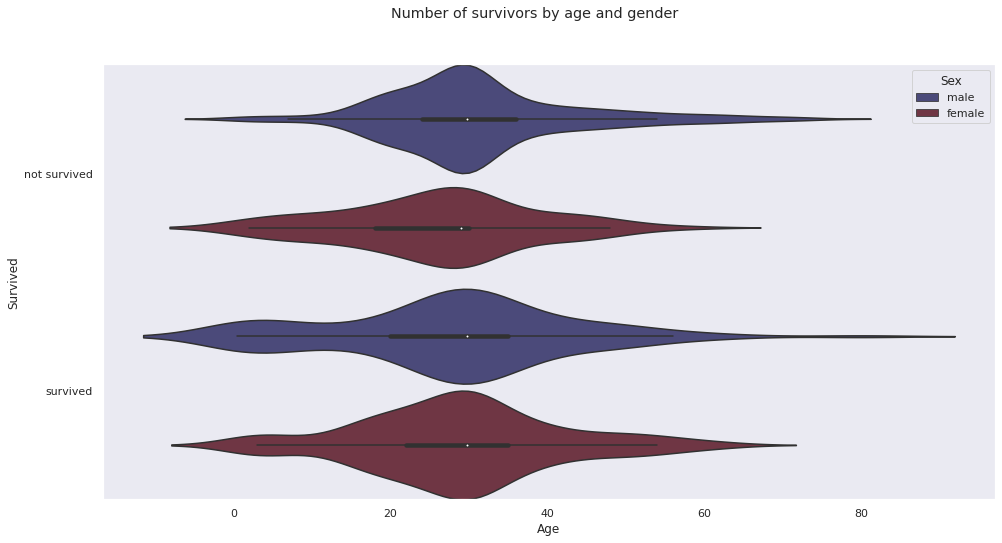

In [60]:
#### age and sex that survived
plt.figure(figsize=(16,8))
plt.suptitle('Number of survivors by age and gender')
sns.violinplot(x='Age',y='Survived',hue='Sex',
               data=train,orient='h',palette='icefire',width=1,color='k')
plt.show()

Most of the passengers were between the age of 20 and 40 years. The highest number of survivors were male between age of 0 years to 80 years.Although there were fewer survivors than casualities.

## 8.1 Correlation

In [71]:
#### encoding our train data set
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
data=pd.DataFrame()
for i in train.columns:
  data[i]=ll.fit_transform(train[i])
### encoding test dataset
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
df=pd.DataFrame()
for i in test.columns:
  df[i]=ll.fit_transform(test[i])

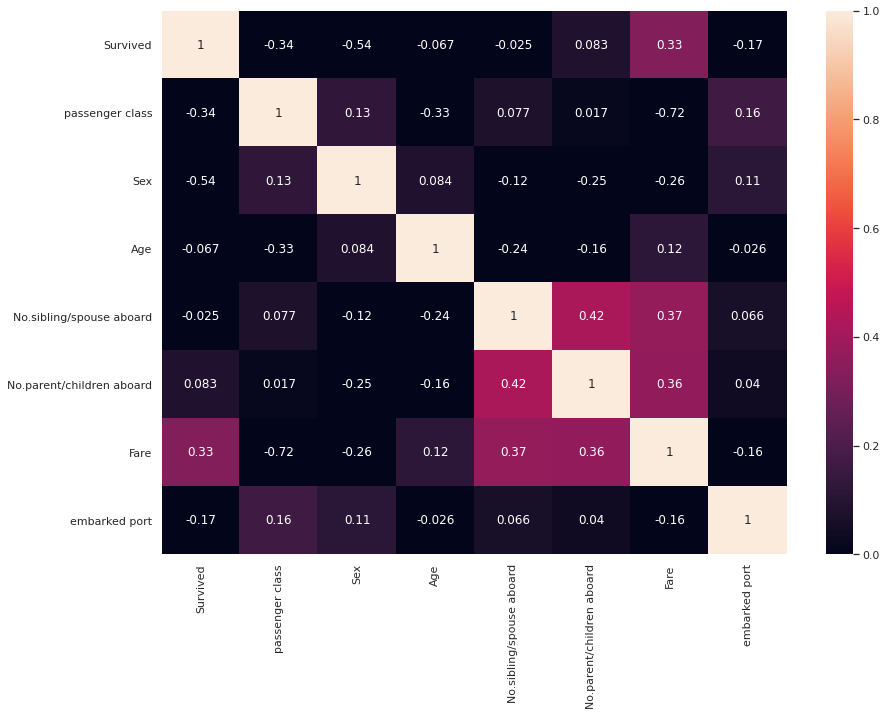

In [73]:
## drawing our heatmaps
fig,plt.figure(figsize=(14,10))
ax=sns.heatmap(data.corr(),annot=True,color='Pink',vmax=1,vmin=0)

There is a inverse correlation between  survivor and Sex, and survivor  the class of th passenger..

A weak positive correlation between survivor and the fare spent..


# 9. **Predictive Modelling**

In [170]:
#### splitting our dataset into features and label
x=data.drop('Survived',1)
y=data['Survived']

In [171]:
##### standardizing the features
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

### The 80 - 20 Train - Test split.

In [172]:
#### splitting the data into 80 20 train and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Introduce KNN Classifier with GridSearch Hyperparameters

In [177]:
#### performing KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors':[3,7,11,15,19],
    'weights':['uniform','distance'],
    'metric': ['euclidean', 'manhattan']}

knn_gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1) 

In [178]:
knn_gs_results = knn_gs.fit(x_train,y_train)
knn_gs_results

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 7, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [179]:
knn_df=pd.DataFrame(knn_gs_results.cv_results_)
knn_df.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.002039,0.000389,0.007948,0.001326,0.812937,0.877817,0.822535,0.778873,0.835211,0.825475,0.033389,10.350000
std,0.000403,0.000658,0.003563,0.001141,0.015534,0.009496,0.014378,0.014878,0.011960,0.007708,0.006040,6.054794
min,0.001733,0.000039,0.003495,0.000104,0.769231,0.859155,0.795775,0.739437,0.809859,0.811553,0.024430,1.000000
25%,0.001803,0.000064,0.004766,0.000464,0.804196,0.873239,0.816901,0.772887,0.830986,0.819642,0.030125,5.000000
50%,0.001888,0.000097,0.007879,0.001124,0.818182,0.880282,0.823944,0.781690,0.838028,0.828415,0.032294,10.500000
75%,0.001987,0.000193,0.010986,0.001656,0.818182,0.882042,0.830986,0.788732,0.845070,0.829834,0.035502,15.250000
max,0.003063,0.002101,0.012549,0.003770,0.832168,0.894366,0.852113,0.795775,0.852113,0.836876,0.045849,20.000000


In [180]:
print(knn_gs_results.best_score_)
print(knn_gs_results.best_estimator_)
print(knn_gs_results.best_params_)

0.8368758002560821
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


In [181]:
# Train model using best model
knn_best=knn_gs_results.best_estimator_
knn_best.fit(x_train,y_train)

# predicting
y_pred_best=knn_best.predict(x_test)

In [182]:
best_pred=pd.DataFrame({'actual':y_test,'predicted':y_pred_best})
best_pred.describe()

,actual,predicted
count,178.000000,178.000000
mean,0.410112,0.359551
std,0.493241,0.481222
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [153]:
# checking the model accuracy
from  sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy score: \t',accuracy_score(y_test,y_pred_best))
print('_______________________________________')
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_best))
print('_____________________________________')
print('classification report:\n',classification_report(y_test,y_pred_best))

accuracy score: 	 0.7471910112359551
_______________________________________
confusion matrix:
 [[87 18]
 [27 46]]
_____________________________________
classification report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       105
           1       0.72      0.63      0.67        73

    accuracy                           0.75       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.74      0.75      0.74       178



### The 70 - 30 Train - Test split.

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [155]:
knn_gs_results = knn_gs.fit(x_train,y_train)
knn_gs_results

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 7, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [157]:
knn_df=pd.DataFrame(knn_gs_results.cv_results_)
knn_df.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.002056,0.000493,0.007278,0.001043,0.814000,0.803600,0.804839,0.791935,0.839516,0.810778,0.020037,10.450000
std,0.000435,0.000775,0.003460,0.001024,0.018513,0.014091,0.018052,0.019334,0.016936,0.011486,0.004482,5.906954
min,0.001681,0.000036,0.003153,0.000093,0.776000,0.776000,0.782258,0.741935,0.806452,0.784542,0.009471,1.000000
25%,0.001817,0.000072,0.003980,0.000276,0.798000,0.800000,0.790323,0.782258,0.828629,0.806290,0.017428,5.750000
50%,0.001852,0.000100,0.007384,0.000420,0.824000,0.800000,0.802419,0.794355,0.846774,0.813542,0.020785,10.500000
75%,0.002237,0.000742,0.009828,0.001692,0.832000,0.808000,0.814516,0.806452,0.848790,0.817497,0.023020,15.250000
max,0.003373,0.002840,0.012469,0.003032,0.832000,0.832000,0.846774,0.822581,0.862903,0.826387,0.028063,20.000000


In [158]:
print(knn_gs_results.best_score_)
print(knn_gs_results.best_estimator_)
print(knn_gs_results.best_params_)

0.8263870967741935
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


In [159]:
# Train model using best model
knn_best=knn_gs_results.best_estimator_
knn_best.fit(x_train,y_train)

# predicting
y_pred_best=knn_best.predict(x_test)

In [160]:
best_pred=pd.DataFrame({'actual':y_test,'predicted':y_pred_best})
best_pred.describe()

,actual,predicted
count,267.000000,267.000000
mean,0.411985,0.348315
std,0.493117,0.477331
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [161]:
# checking the model accuracy
from  sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy score: \t',accuracy_score(y_test,y_pred_best))
print('_______________________________________')
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_best))
print('_____________________________________')
print('classification report:\n',classification_report(y_test,y_pred_best))

accuracy score: 	 0.8089887640449438
_______________________________________
confusion matrix:
 [[140  17]
 [ 34  76]]
_____________________________________
classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.82      0.69      0.75       110

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



### The 60 - 40 Train - Test split.

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [163]:
knn_gs_results = knn_gs.fit(x_train,y_train)
knn_gs_results

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 7, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [165]:
knn_df=pd.DataFrame(knn_gs_results.cv_results_)
knn_df.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.001985,0.000700,0.006770,0.001365,0.860280,0.801869,0.817290,0.795283,0.836792,0.822303,0.026321,10.350000
std,0.000694,0.001286,0.003402,0.001226,0.012675,0.016497,0.012307,0.017069,0.017341,0.006768,0.007411,5.760802
min,0.001564,0.000048,0.003018,0.000105,0.841121,0.775701,0.794393,0.764151,0.801887,0.810439,0.011878,1.000000
25%,0.001635,0.000072,0.003555,0.000297,0.850467,0.792056,0.813084,0.783019,0.827830,0.817060,0.021376,5.750000
50%,0.001702,0.000090,0.006330,0.000873,0.859813,0.803738,0.817757,0.792453,0.839623,0.821751,0.026698,10.500000
75%,0.001904,0.000473,0.009597,0.002208,0.869159,0.813084,0.822430,0.811321,0.849057,0.827879,0.030304,15.250000
max,0.004094,0.004392,0.013224,0.004446,0.887850,0.822430,0.841121,0.820755,0.858491,0.833028,0.038656,20.000000


In [166]:
print(knn_gs_results.best_score_)
print(knn_gs_results.best_estimator_)
print(knn_gs_results.best_params_)

0.8330276847116911
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [167]:
# Train model using best model
knn_best=knn_gs_results.best_estimator_
knn_best.fit(x_train,y_train)

# predicting
y_pred_best=knn_best.predict(x_test)

In [168]:
best_pred=pd.DataFrame({'actual':y_test,'predicted':y_pred_best})
best_pred.describe()

,actual,predicted
count,356.000000,356.000000
mean,0.393258,0.334270
std,0.489161,0.472398
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [169]:
# checking the model accuracy
from  sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy score: \t',accuracy_score(y_test,y_pred_best))
print('_______________________________________')
print('confusion matrix:\n',confusion_matrix(y_test,y_pred_best))
print('_____________________________________')
print('classification report:\n',classification_report(y_test,y_pred_best))

accuracy score: 	 0.7949438202247191
_______________________________________
confusion matrix:
 [[190  26]
 [ 47  93]]
_____________________________________
classification report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       216
           1       0.78      0.66      0.72       140

    accuracy                           0.79       356
   macro avg       0.79      0.77      0.78       356
weighted avg       0.79      0.79      0.79       356



# **Conclusion**

<hr>

> __a.)Split 80 - 20__ <br>
Best_Score: 83.69% <br>
Accuracy Score: 74.72% <br>

<hr>

> __b.)Split 70 - 30__ <br>
Best_Score: 82.64% <br>
Accuracy Score: 80.90% <br>

<hr>

> __c.)Split 60 - 40__ <br>
Best_Score: 83.30% <br>
Accuracy Score: 79.49% <br>

__For this dataset, a 70 - 30 split gives best result of 80.90 accuracy score of predicting the people who survived the Titanic.__

# Follow-up Questions

a) Do we need other data to answer the research question

Yes.The data on test should have Label column. This would have made the test dataset more useful. 